## LAB 2

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Exercise 1
used source: http://www.math.uchicago.edu/~may/VIGRE/VIGRE2010/REUPapers/Mcquighan.pdf

In [2]:
def generate_poisson_trajectory(lbda, T):
    ts, t = [0], 0
    while t <= T:
        u = np.random.uniform(0, 1)
        y = -math.log(1 - u) / lbda
        t = t + y
        if t <= T:
            ts.append(t)
    return ts

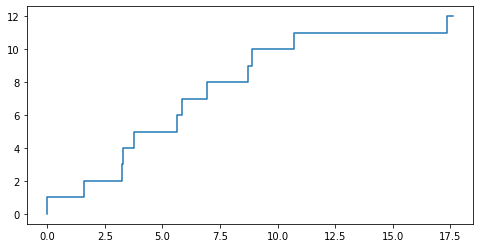

In [4]:
fig, ax = plt.subplots(figsize=(8, 4))

ts = generate_poisson_trajectory(0.5, 25)
ax.step(ts, [i for i in range(0, len(ts))])
ax

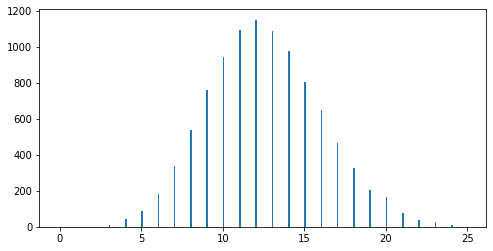

In [5]:
lbda = 0.5
T = 25
results = []
for x in range(0, 10000):
    results.append(len(generate_poisson_trajectory(lbda, T)) - 1)

fig, ax = plt.subplots(figsize=(8, 4))
data = np.arange(0, 25, 0.1)
ax.hist(results, bins=data)
ax